# Pytorch基础

Pytorch用于进行深度学习模型搭建。其支持与numpy中的ndarray相似的数据结构tensor，以及自动求导

tensor可以与ndarray相互转换

In [18]:
import numpy as np
import torch

In [19]:
x = torch.tensor([3., 1.2, 3.])
x

tensor([3.0000, 1.2000, 3.0000])

In [20]:
x.numpy()

array([3. , 1.2, 3. ], dtype=float32)

tensor可以干numpy能干的几乎所有事情

In [21]:
torch.sqrt(x)

tensor([1.7321, 1.0954, 1.7321])

如果需要改变参数自身的值，只需要在函数后面加下划线即可

In [22]:
x

tensor([3.0000, 1.2000, 3.0000])

In [23]:
torch.sqrt_(x)
x

tensor([1.7321, 1.0954, 1.7321])

## 自动求导

Pytorch通过构造计算图来推导出反向求导图，从而实现自动求导

其通过`requires_grad_()`方法来设置某个变量可导，然后通过`backward()`进行反向传导

以下面的计算图为例：

<img src="img/02_01.png" />

其代码实现如下：

In [32]:
x = torch.Tensor([3.]) # 初始化常量x
w = torch.randn(1, requires_grad = True) # 随机初始化待求导参数w
b = torch.randn(1, requires_grad = True) # 随机初始化待求导参数b

y = w * x
z = y + b

print(x.requires_grad)
print(w.requires_grad)
print(b.requires_grad)
print(y.requires_grad)
print(z.requires_grad)

False
True
True
True
True


此时每个变量都可以看做是计算图中的一个节点

此时查看每个节点的`grad_fn`：

In [33]:
print(x.grad_fn)
print(w.grad_fn)
print(b.grad_fn)
print(y.grad_fn)
print(z.grad_fn)

None
None
None


可以看出其已经设置好了反向求导的梯度函数了

于是其反向求导的计算图如下所示：

<img src="img/02_02.png" />

此时对z求`backward()`的话就可以很轻松的得到z对每个标记了`requires_grad`的**叶子节点**的偏导了

In [34]:
z.backward()

print(x.grad)
print(w.grad)
print(b.grad)

None
tensor([3.])
tensor([1.])


## 使用Pytorch实现机器学习

下面利用Pytorch的自动求导机制，手写一遍线性回归

先生成训练数据：

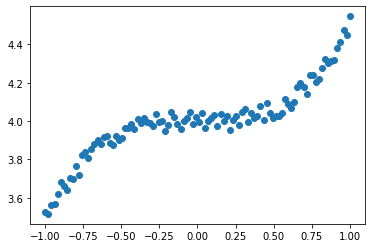

In [39]:
from matplotlib import pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1) # unsqueeze是为了让x转换成列向量
y = 0.5 * x.pow(3) + 4 + 0.1 * torch.rand(x.size()) - 0.05 # 生成数据集y，并加一些噪音

plt.scatter(x.numpy(), y.numpy())
plt.show()

下面假设x和y为训练数据，假设方程为`y=wx^3+b`，进行梯度下降：

tensor([[0.4945]], requires_grad=True) tensor([[4.0025]], requires_grad=True)


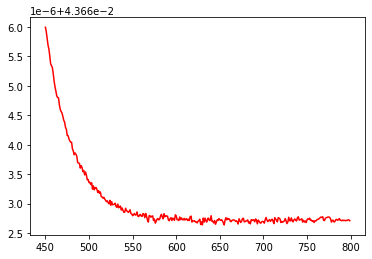

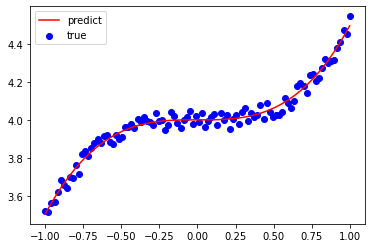

In [76]:
# 初始化参数，记得设置requires_grad
w = torch.randn(1, 1, dtype = torch.float, requires_grad = True) # w初始化为1*1的随机矩阵
b = torch.zeros(1, 1, dtype = torch.float, requires_grad = True) # b初始化为1*1的全零矩阵

# 初始化学习率
lr = 0.001

# 初始化损失函数记录列表
loss_list = np.array([])

# 迭代800次梯度下降
for itr in range(800):
    # 前向传播，定义损失函数loss
    y_pred = x.pow(3) * w + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # 更新损失函数列表
    loss_list = np.append(loss_list, loss.detach().numpy())
    
    # 自动计算梯度
    loss.backward()
    
    # 手动更新参数，这里需要使用no_grad()，使上下文环境中切断自动求导的计算
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        
    # 梯度清零
    w.grad.zero_()
    b.grad.zero_()
    
# 训练结果输出
print(w, b)

# 输出损失函数下降的末端图像
plt.plot(np.arange(np.size(loss_list) - 450) + 450, loss_list[450:], 'r-')
plt.show()

y_pred = x.pow(3) * w + b
plt.plot(x.numpy(), y_pred.detach().numpy(), 'r-', label='predict')
plt.scatter(x.numpy(), y.numpy(), color='blue', marker='o', label='true')
plt.legend()
plt.show()